In [14]:
# Bayesian probabilistic linear model of Dissolved Oxygen
# Piracicaba river

import pymc3 as pm
import numpy as np
import os
import pandas as pd
import arviz as az

RANDOM_SEED = 58
print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.8


In [15]:
# load data
DATA_DIR = "C:\\Users\DELL\Documents\Fernando" 
planilha = os.path.join(DATA_DIR, "Rio_Piracicaba2.csv")

df = pd.read_csv(planilha, sep=";", decimal=",", header=0)
#output calibration
dOD = df['OD']
#calibration set
df2= pd.DataFrame(df, columns=['DBO', 'Temp', 'Vazao', 'pH', 'NH3', 'Fosf', 'NO2', 'NO3', 'Kje', 'Turb'])

#validation/prediction set
planilha2 = os.path.join(DATA_DIR, "Rio_Piracicaba3.csv")

df3 = pd.read_csv(planilha2, sep=";", decimal=",", header=0)
df4= pd.DataFrame(df3, columns=['DBO', 'Temp', 'Vazao', 'pH', 'NH3', 'Fosf', 'NO2', 'NO3', 'Kje', 'Turb'])


In [16]:
#Probabilistic linear model building
with pm.Model() as model:
    a = pm.Normal('a', mu=dOD.mean(), sd=2)
    bA = pm.Normal('bA', mu=0, sd=2, shape=10) # shape = No de bA's
    sigma = pm.Uniform('sigma', lower=0, upper=5)
    X = pm.Data('X', df2)
    mu = pm.Deterministic('mu', a + pm.math.dot(X, bA))
   
    OD = pm.Normal('OD', mu=mu, sd=sigma, observed=dOD)
    trace = pm.sample(2000, tune=2000, random_seed=RANDOM_SEED)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, bA, a]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 8000/8000 [00:11<00:00, 709.15draws/s]


In [17]:
var_names = ['a', 'bA', 'sigma']
pm.summary(trace, var_names) #Visualization of all parameters

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
a,4.150,0.125,3.928,4.395,0.002,0.001,4547.0,4540.0,4552.0,2809.0,1.0
bA[0],-0.355,0.133,-0.604,-0.112,0.002,0.001,5306.0,4777.0,5271.0,2668.0,1.0
bA[1],-0.673,0.150,-0.945,-0.388,0.002,0.001,5126.0,5025.0,5137.0,3053.0,1.0
bA[2],0.647,0.171,0.322,0.967,0.003,0.002,3832.0,3753.0,3854.0,2998.0,1.0
bA[3],-0.116,0.135,-0.379,0.130,0.002,0.002,5914.0,3262.0,5923.0,3203.0,1.0
bA[4],-0.383,0.196,-0.762,-0.026,0.003,0.002,4087.0,4087.0,4084.0,3239.0,1.0
bA[5],0.010,0.129,-0.229,0.251,0.002,0.002,5579.0,1926.0,5612.0,3003.0,1.0
bA[6],0.019,0.121,-0.193,0.261,0.001,0.002,7173.0,1915.0,7238.0,3201.0,1.0
bA[7],0.018,0.134,-0.239,0.267,0.002,0.002,5508.0,2016.0,5485.0,2943.0,1.0
bA[8],-0.268,0.187,-0.596,0.101,0.003,0.002,3856.0,3571.0,3855.0,3293.0,1.0


C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\anaconda3\envs\PyMC\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002649A0D53A0>,
      dtype=object)

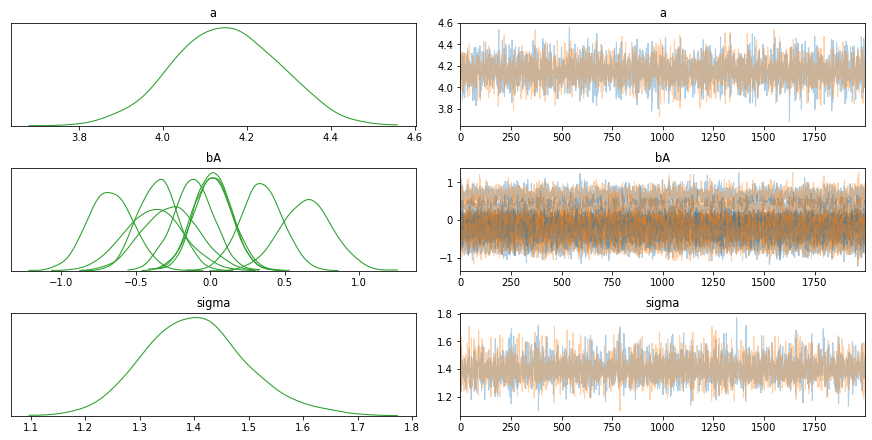

In [20]:
az.plot_trace(trace, var_names= var_names, compact = True, combined = True) #graphical Visualization of PDFs

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000264943E0130>],
      dtype=object)

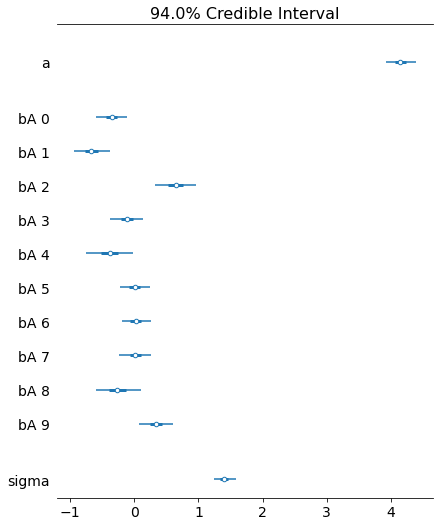

In [7]:
az.plot_forest(trace, kind='forestplot', var_names=var_names, combined=True)#graphical Visualization of parameters

In [8]:
# Estimated calibration values
OD_cal = pm.sample_posterior_predictive(trace, samples=3000, model=model)['OD']

C:\anaconda3\envs\PyMC\lib\site-packages\pymc3\sampling.py:1246: UserWarning: samples parameter is smaller than nchains times ndraws, some draws and/or chains may not be represented in the returned posterior predictive sample
  warnings.warn(
100%|█████████████████████████████████████████████████████████████████████████████| 3000/3000 [00:03<00:00, 766.05it/s]


In [9]:
# Save the DO calibration results as text file
np.savetxt('OD_cal.txt', OD_cal.mean(0), delimiter=' ', newline='\n')

In [10]:
# Estimated prediction values - 20 prediction samples
with model:
     pm.set_data({'X': pd.DataFrame(df4, index=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])})#index of samples
     OD_test = pm.sample_posterior_predictive(trace, model=model, random_seed=RANDOM_SEED)['OD']        

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:10<00:00, 376.06it/s]


In [11]:
# Save the DO prediction results as text file
np.savetxt('OD_test.txt', OD_test.mean(axis=0), delimiter=' ', newline='\n')